## 利用 KNN 算法实现手写数字识别

> 本文通过一个完整示例演示如何使用 KNN 对 MNIST 手写数字进行分类，包含数据读取、可视化、训练/测试集划分、模型训练、模型保存与预测。

![数据集](https://photo.20061204.xyz/file/AgACAgUAAyEGAASlJlL_AAMPaX9YyPLa3FxvlIRNC1jabEoGuy4AAl4PaxsSovlXVXB3Le_uBYQBAAMCAAN3AAM4BA.png)

### 实现流程：
- 1. 读取数据集并可视化样本
- 2. 数据预处理（归一化 + 划分训练/测试集）
- 3. 训练 KNN 模型
- 4. 保存模型并进行预测
- 5. 查看完整流程图

#### **第一步：** 读取 MNIST 数据并可视化样本

MNIST 每张图是 $28\times28$ 的灰度图，展开后就是 784 维特征。CSV 结构通常是：

- 第 1 列：标签（0~9）
- 第 2~785 列：像素值（0~255）

可视化函数会读取 CSV，取出指定索引的一行像素并画出来，方便确认数据是否读取正确。

#### **第二步：** 数据预处理

训练前做两件事：

1. 像素归一化到 $[0,1]$
2. 划分训练集/测试集（用于评估）

> 说明：这里演示文件使用 `mnist_test.csv`，正式训练建议替换成训练集文件。

#### **第三步：** 训练 KNN 模型

创建 `KNeighborsClassifier`，设置邻居数 `n_neighbors=5`，用训练集拟合模型。训练完成后用测试集计算准确率。

#### **第四步：** 保存模型并进行预测

模型训练完成后保存到 `./my_model/knn_mnist_model.pkl`，预测时直接加载。

- 读取 `demo.png` 作为输入（建议 $28\times28$ 灰度图）
- `plt.imread()` 读入的像素已经在 $[0,1]$，无需再次归一化
- reshape 为 $1\times784$ 后进行预测


### 总结
本 Notebook 完成了手写数字识别的 KNN 流程：数据读取、可视化、训练/测试集划分、模型训练与评估、模型保存与预测。后续可通过调整 `n_neighbors` 或尝试不同距离度量进一步优化效果。

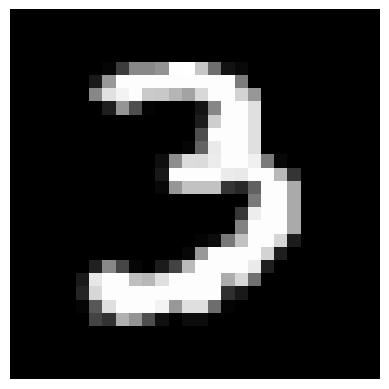

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib					# 保存模型

# 每张图片都是由 28 * 28 = 784 个像素点组成的 
# 我们可以把每张图片看作是一个包含 784 个特征的样本。

# 定义函数，接受用户传入索引，显示对应的手写数字图片
def show_digit(index):
	data = pd.read_csv('./data/mnist_test.csv')  # 读取数据集
	if(index < 0 or index >= len(data)):
		print("索引超出范围，请输入有效的索引值（0-{}）".format(len(data)-1))
		return

	X = data.iloc[:, 1:]  # 提取像素数据
	image = X.iloc[index].values.reshape(28, 28)  # 将一维数组重塑为28x28的二维数组
	plt.imshow(image, cmap='gray')                   # 使用灰度图显示图片
	plt.axis('off')                                  # 关闭坐标轴
	plt.show()                                       # 显示图片

show_digit(9)


In [ ]:
# 训练模型并保存
def train_model():
	data = pd.read_csv('./data/mnist_test.csv')  # 读取数据集
	X = data.iloc[:, 1:] / 255.0  # 提取像素数据并归一化
	y = data.iloc[:, 0]   # 提取标签数据

	# 将数据集拆分为训练集和测试集
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40)

	# 创建KNN分类器实例
	knn = KNeighborsClassifier(n_neighbors=5)

	# 训练模型
	knn.fit(X_train, y_train)

	# 在测试集上评估模型
	accuracy = knn.score(X_test, y_test)
	print("模型在测试集上的准确率: {:.2f}%".format(accuracy * 100))

	# 保存模型到文件
	joblib.dump(knn, './my_model/knn_mnist_model.pkl')
	print("模型训练完成并已保存到 'my_model/knn_mnist_model.pkl' 文件中。")

train_model()

In [ ]:
# 加载模型并进行预测
def load_model_and_predict():
	# 加载保存的模型
	knn = joblib.load('./my_model/knn_mnist_model.pkl')

	# 加载图片数据
	X = plt.imread('./data/demo.png') 

	# 绘制图片
	plt.imshow(X, cmap='gray')
	plt.axis('off')
	plt.show()
	
	# 注意，此时图片不需要进行归一化了，因为通过plt.imread读取的像素值已经在0-1之间
	X = X.reshape(1, -1)# 重塑为一维数组

	# 使用加载的模型进行预测
	prediction = knn.predict(X)
	print("预测的数字是:", prediction[0])

load_model_and_predict()